# Exploratory Data Analysis Starter

## Import packages

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [7]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [8]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

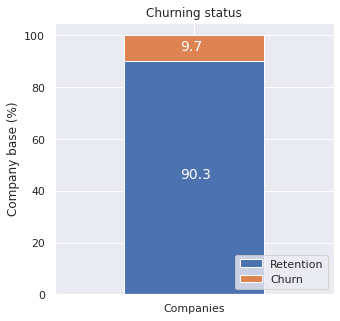

In [9]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

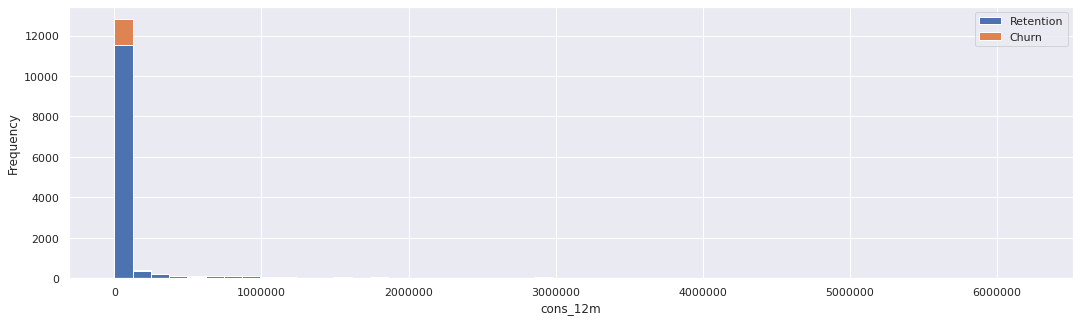

In [10]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

For your final deliverable, please submit your analysis (in the form of a jupyter notebook, code script or PDF) as well as your half-page summary document.

**Note**: Use the 2 datasets within the additional resources for this task and if you’re unsure on where to start with visualizing data, use the accompanying links. Be sure to also use the data description document to understand what the columns represent. The task description document outlines the higher-level motivation of the project. Finally, use the eda_starter.ipynb file to get started with some helper functions and methods.

If you are stuck: Think about ways you can define price sensitivity. Make sure to think of all possible ways and investigate them.

Estimated time for task completion: 1.75 hours depending on your learning style.

# **Data Cleaning**

In [19]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [21]:
client_df.duplicated().sum()

0

In [22]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [23]:
price_df.duplicated().sum()

0

In [24]:
# Change datatype of dates to datetime
client_df.loc[:,['date_activ','date_end','date_modif_prod','date_renewal']] = client_df.loc[:,['date_activ','date_end','date_modif_prod','date_renewal']].apply(pd.to_datetime, errors='coerce')
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [105]:
print('MIN electricity consumption of the past 12 months',min(client_df['cons_12m']))
print('MEAN electricity consumption of the past 12 months',client_df['cons_12m'].mean())
print('MAX electricity consumption of the past 12 months',max(client_df['cons_12m']))
client_df['cons_12m'].describe()

MIN electricity consumption of the past 12 months 0
MEAN electricity consumption of the past 12 months 159220.2862522251
MAX electricity consumption of the past 12 months 6207104


count    1.460600e+04
mean     1.592203e+05
std      5.734653e+05
min      0.000000e+00
25%      5.674750e+03
50%      1.411550e+04
75%      4.076375e+04
max      6.207104e+06
Name: cons_12m, dtype: float64

In [104]:
print('MIN gas consumption of the past 12 months',min(client_df['cons_gas_12m']))
print('MEAN gas consumption of the past 12 months',client_df['cons_gas_12m'].mean())
print('MAX gas consumption of the past 12 months',max(client_df['cons_gas_12m']))
client_df['cons_gas_12m'].describe()

MIN gas consumption of the past 12 months 0
MEAN gas consumption of the past 12 months 28092.375325208817
MAX gas consumption of the past 12 months 4154590


count    1.460600e+04
mean     2.809238e+04
std      1.629731e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.154590e+06
Name: cons_gas_12m, dtype: float64

In [109]:
print('MIN predictive electricity consumption of the next 12 months',min(client_df['forecast_cons_12m']))
print('MEAN predictive electricity consumption of the next 12 months',client_df['forecast_cons_12m'].mean())
print('MAX predictive electricity consumption of the next 12 months',max(client_df['forecast_cons_12m']))
client_df['forecast_cons_12m'].describe()

MIN predictive electricity consumption of the next 12 months 0.0
MEAN predictive electricity consumption of the next 12 months 1868.6148795015747
MAX predictive electricity consumption of the next 12 months 82902.83


count    14606.000000
mean      1868.614880
std       2387.571531
min          0.000000
25%        494.995000
50%       1112.875000
75%       2401.790000
max      82902.830000
Name: forecast_cons_12m, dtype: float64

In [111]:
print('MIN current consumption of the past 12 months',min(client_df['imp_cons']))
print('MEAN current consumption of the past 12 months',client_df['imp_cons'].mean())
print('MAX current consumption of the past 12 months',max(client_df['imp_cons']))
client_df['imp_cons'].describe()

MIN current consumption of the past 12 months 0.0
MEAN current consumption of the past 12 months 152.7868957962481
MAX current consumption of the past 12 months 15042.79


count    14606.000000
mean       152.786896
std        341.369366
min          0.000000
25%          0.000000
50%         37.395000
75%        193.980000
max      15042.790000
Name: imp_cons, dtype: float64

In [121]:
client_df['cons_12m_group']=pd.cut(client_df['cons_12m'],[0,10000,20000,50000,100000,200000,300000,400000,500000,1000000,9999999999],
                         labels=['<10k','10k-20k','20k-50k','50k-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-1000k','>1000k'])
client_df['cons_gas_12m_group']=pd.cut(client_df['cons_gas_12m'],[0,10000,20000,50000,100000,200000,300000,400000,500000,1000000,9999999999],
                         labels=['<10k','10k-20k','20k-50k','50k-100k','100k-200k','200k-300k','300k-400k','400k-500k','500k-1000k','>1000k'])
client_df['forecast_cons_12m_group']=pd.cut(client_df['forecast_cons_12m'],[0,500,1000,2000,3000,4000,5000,10000,9999999999],
                         labels=['<0.5k','0.5k-1k','1k-2k','2k-3k','3k-4k','4k-5k','5k-10k','>10k'])
client_df['imp_cons_group']=pd.cut(client_df['imp_cons'],[0,100,200,300,400,500,1000,2000,9999999999],
                         labels=['<0.1k','0.1k-0.2k','0.2k-0.3k','0.3k-0.4k','0.4k-0.5k','0.5k-1k','1k-2k','>2k'])

In [28]:
client_df['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [29]:
client_df['nb_prod_act'].value_counts()

1     11431
2      2445
3       523
4       150
5        31
9        11
6         8
8         4
10        2
32        1
Name: nb_prod_act, dtype: int64

In [30]:
client_df['num_years_antig'].value_counts()

6     4769
4     3982
3     2433
5     2317
7      509
11     185
12     110
8      103
9       92
10      81
13      13
2       11
1        1
Name: num_years_antig, dtype: int64

In [74]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [39]:
client_df['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

In [88]:
client_df['year_activ'] = client_df['date_activ'].dt.year

client_df['year_end'] = client_df['date_end'].dt.year

client_df['year_modif_prod'] = client_df['date_modif_prod'].dt.year

client_df['year_renewal'] = client_df['date_renewal'].dt.year

client_df['month_activ'] = client_df['date_activ'].dt.month_name()

client_df['month_end'] = client_df['date_end'].dt.month_name()

client_df['month_modif_prod'] = client_df['date_modif_prod'].dt.month_name()

client_df['month_renewal'] = client_df['date_renewal'].dt.month_name()

In [34]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [35]:
# Change datatype of dates to datetime
price_df['price_date'] = price_df['price_date'].apply(pd.to_datetime, errors='coerce')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [36]:
price_df['id'].value_counts()

038af19179925da21a25619c5a24b745    12
97589d95ec46ab31ef238d18a616403f    12
97adbcd721fae4874f7ee287ea84200d    12
d74b4544363be674855cf931b6b8af25    12
27276020e48d73f589788d4e37c51879    12
                                    ..
83cf18b07114e495ae8b7fb235e45ee2     8
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: id, Length: 16096, dtype: int64

# **Subtask 1**

Perform some exploratory data analysis. Look into the data types, data statistics, specific parameters, and variable distributions. This first subtask is for you to gain a holistic understanding of the dataset. You should spend around 1 hour on this.

In [67]:
# functions of developing charts
def bar_label_value(ax):
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 10
        y = p.get_y() + p.get_height()
        ax.annotate('{:.0f}'.format(p.get_height()), (x, y), size = 12)

def bar_label_percentage(ax,the_data):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(the_data))
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

def bar_chart(the_data,x_attr,y_attr,hue_attr,palette,count_flag):
    # Initialize figure and axis
    if count_flag:
        sns.countplot(x = x_attr, hue = hue_attr, data = the_data, palette = palette)
    else:
        sns.barplot(x = x_attr, y = y_attr, hue = hue_attr, data = the_data,
            palette = palette, edgecolor = 'w')

def plot_complex(the_data,row_size,col_size,titles,topic):
  fig = make_subplots(rows=row_size,cols=col_size,
                      subplot_titles=tuple(titles),
                      horizontal_spacing=0.2,
                      vertical_spacing=0.2)
  count = 0
  for i in range(row_size):
    for j in range(col_size):
      fig.add_trace(go.Bar(x=the_data[titles[count]].value_counts().index, 
                           y=the_data[titles[count]].value_counts(),
                           name=titles[count],
                           textposition='auto',
                           text= [str(i) + '%' for i in (the_data[titles[count]].value_counts(normalize=True)*100).apply(lambda x : round(x)).tolist()],
                          ),row=i+1,col=j+1)
      count += 1
  
  fig.update_layout(title=dict(text = topic,x=0.5,y=0.95),
                    title_font_size=20,
                    showlegend=False,
                    height = 920,
                    margin=dict(l=80, r=80, t=150, b=80))
  
  fig.show()


In [73]:
titles = ['has_gas','nb_prod_act','num_years_antig','origin_up']
topic = 'General Overview of Client Categorical variables'
plot_complex(client_df,2,2,titles,topic)

In [90]:
titles = ['year_activ','year_end','year_modif_prod','year_renewal']
topic = 'General Overview of Client Operation with PowerCo by Year'
plot_complex(client_df,2,2,titles,topic)

In [55]:
titles = ['month_activ','month_end','month_modif_prod','month_renewal']
topic = 'General Overview of Client Operation with PowerCo by Month'
plot_complex(client_df,2,2,titles,topic)

In [123]:
titles = ['cons_12m_group','cons_gas_12m_group','forecast_cons_12m_group','imp_cons_group']
topic = 'General Overview of Client Consumption by Month'
plot_complex(client_df,2,2,titles,topic)

# **Sub-Task 2:**

Verify the hypothesis of price sensitivity being to some extent correlated with churn. It is up to you to define price sensitivity and calculate it. You should spend around 30 minutes on this.

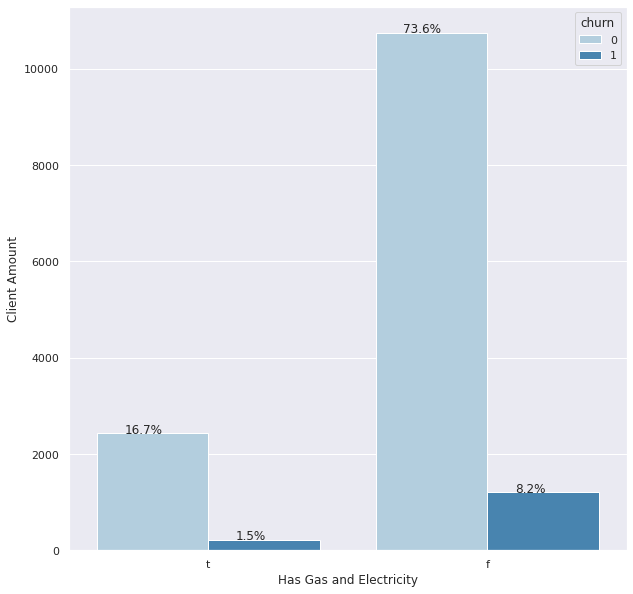

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'has_gas',_,'churn','Blues',True)
ax.set_xlabel("Has Gas and Electricity")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)

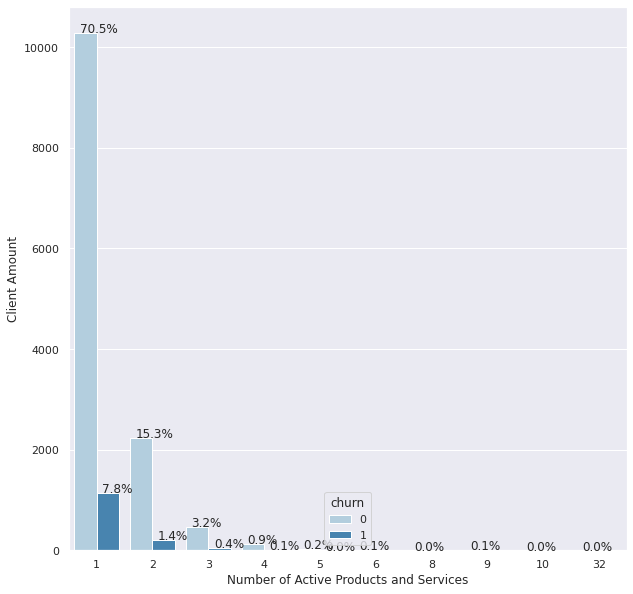

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'nb_prod_act',_,'churn','Blues',True)
ax.set_xlabel("Number of Active Products and Services")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)

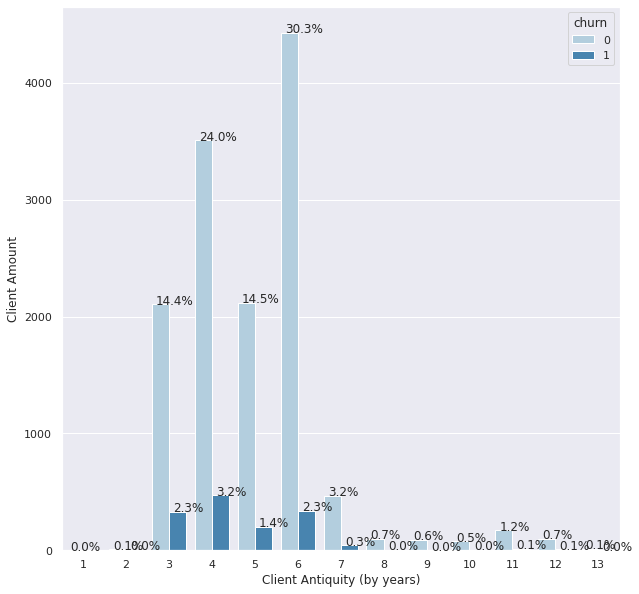

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'num_years_antig',_,'churn','Blues',True)
ax.set_xlabel("Client Antiquity (by years)")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)

[Text(0, 0, 'lxidpiddsbxsbosboudacockeimpuepw'),
 Text(0, 0, 'kamkkxfxxuwbdslkwifmmcsiusiuosws'),
 Text(0, 0, 'ldkssxwpmemidmecebumciepifcamkci'),
 Text(0, 0, 'MISSING'),
 Text(0, 0, 'usapbepcfoloekilkwsdiboslwaxobdp'),
 Text(0, 0, 'ewxeelcelemmiwuafmddpobolfuxioce')]

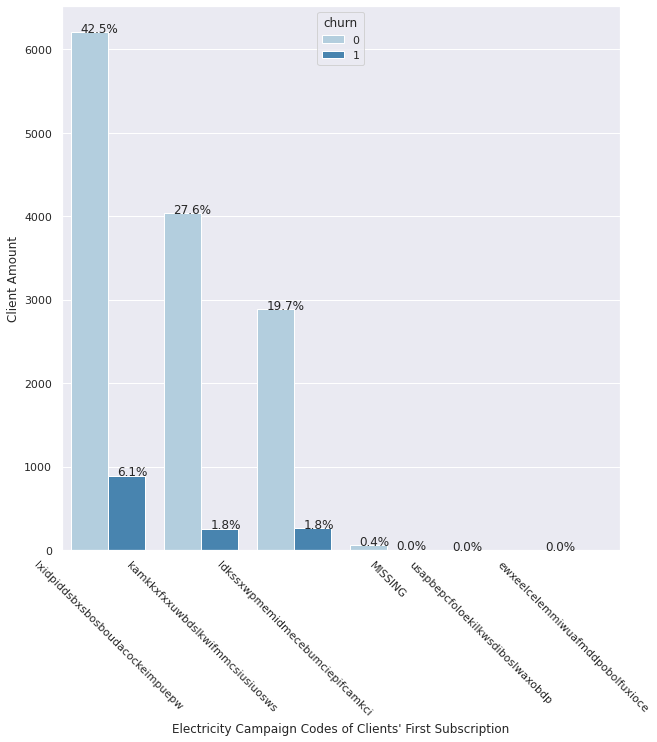

In [83]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'origin_up',_,'churn','Blues',True)
ax.set_xlabel("Electricity Campaign Codes of Clients' First Subscription")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

[Text(0, 0, '<10k'),
 Text(0, 0, '10k-20k'),
 Text(0, 0, '20k-50k'),
 Text(0, 0, '50k-100k'),
 Text(0, 0, '100k-200k'),
 Text(0, 0, '200k-300k'),
 Text(0, 0, '300k-400k'),
 Text(0, 0, '400k-500k'),
 Text(0, 0, '500k-1000k'),
 Text(0, 0, '>1000k')]

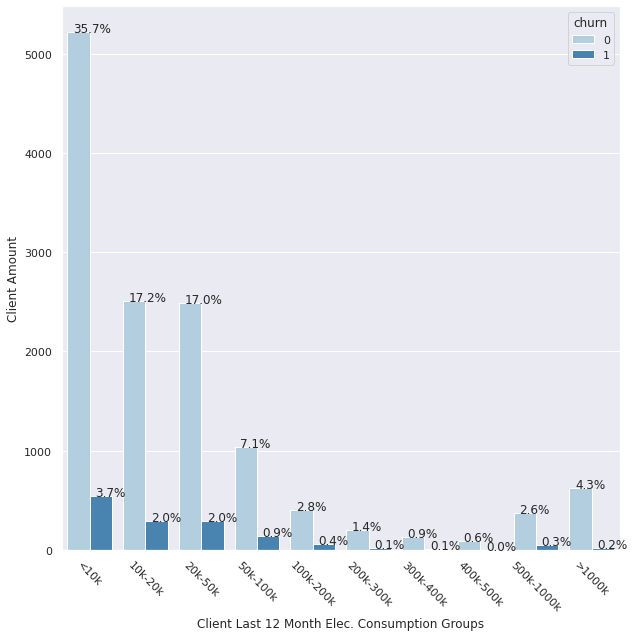

In [127]:
# ['cons_12m_group','cons_gas_12m_group','forecast_cons_12m_group','imp_cons_group']
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'cons_12m_group',_,'churn','Blues',True)
ax.set_xlabel("Client Last 12 Month Elec. Consumption Groups")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

[Text(0, 0, '<10k'),
 Text(0, 0, '10k-20k'),
 Text(0, 0, '20k-50k'),
 Text(0, 0, '50k-100k'),
 Text(0, 0, '100k-200k'),
 Text(0, 0, '200k-300k'),
 Text(0, 0, '300k-400k'),
 Text(0, 0, '400k-500k'),
 Text(0, 0, '500k-1000k'),
 Text(0, 0, '>1000k')]

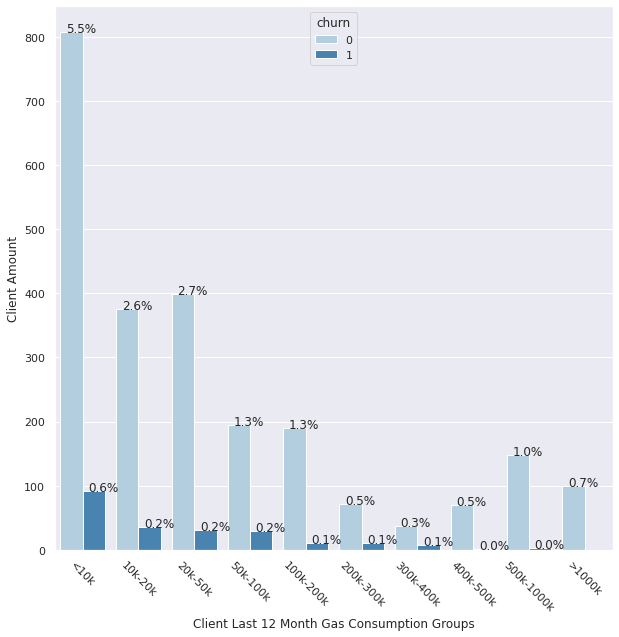

In [128]:
# ['cons_12m_group','cons_gas_12m_group','forecast_cons_12m_group','imp_cons_group']
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'cons_gas_12m_group',_,'churn','Blues',True)
ax.set_xlabel("Client Last 12 Month Gas Consumption Groups")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

[Text(0, 0, '<0.5k'),
 Text(0, 0, '0.5k-1k'),
 Text(0, 0, '1k-2k'),
 Text(0, 0, '2k-3k'),
 Text(0, 0, '3k-4k'),
 Text(0, 0, '4k-5k'),
 Text(0, 0, '5k-10k'),
 Text(0, 0, '>10k')]

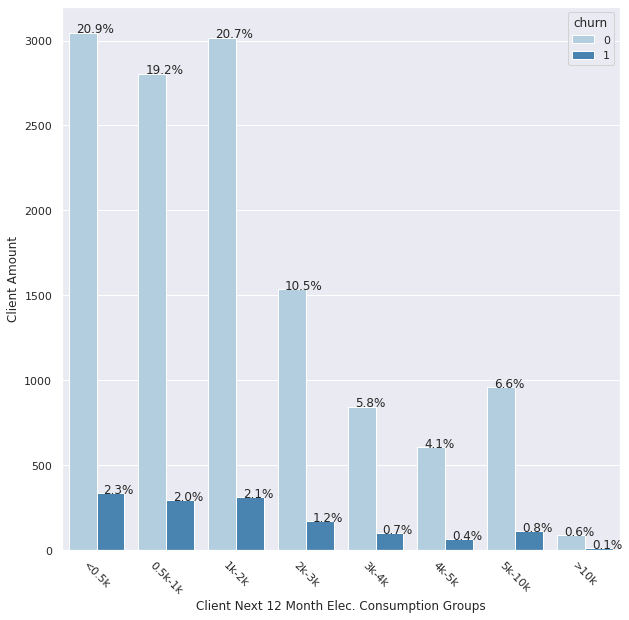

In [129]:
# ['cons_12m_group','cons_gas_12m_group','forecast_cons_12m_group','imp_cons_group']
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'forecast_cons_12m_group',_,'churn','Blues',True)
ax.set_xlabel("Client Next 12 Month Elec. Consumption Groups")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

[Text(0, 0, '<0.1k'),
 Text(0, 0, '0.1k-0.2k'),
 Text(0, 0, '0.2k-0.3k'),
 Text(0, 0, '0.3k-0.4k'),
 Text(0, 0, '0.4k-0.5k'),
 Text(0, 0, '0.5k-1k'),
 Text(0, 0, '1k-2k'),
 Text(0, 0, '>2k')]

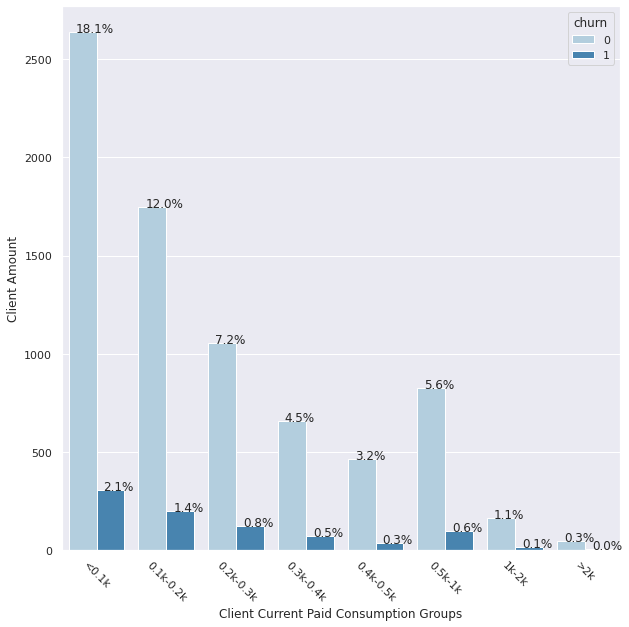

In [130]:
# ['cons_12m_group','cons_gas_12m_group','forecast_cons_12m_group','imp_cons_group']
fig, ax = plt.subplots(figsize=(10, 10))
bar_chart(client_df,'imp_cons_group',_,'churn','Blues',True)
ax.set_xlabel("Client Current Paid Consumption Groups")                         
ax.set_ylabel("Client Amount")
bar_label_percentage(ax,client_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)

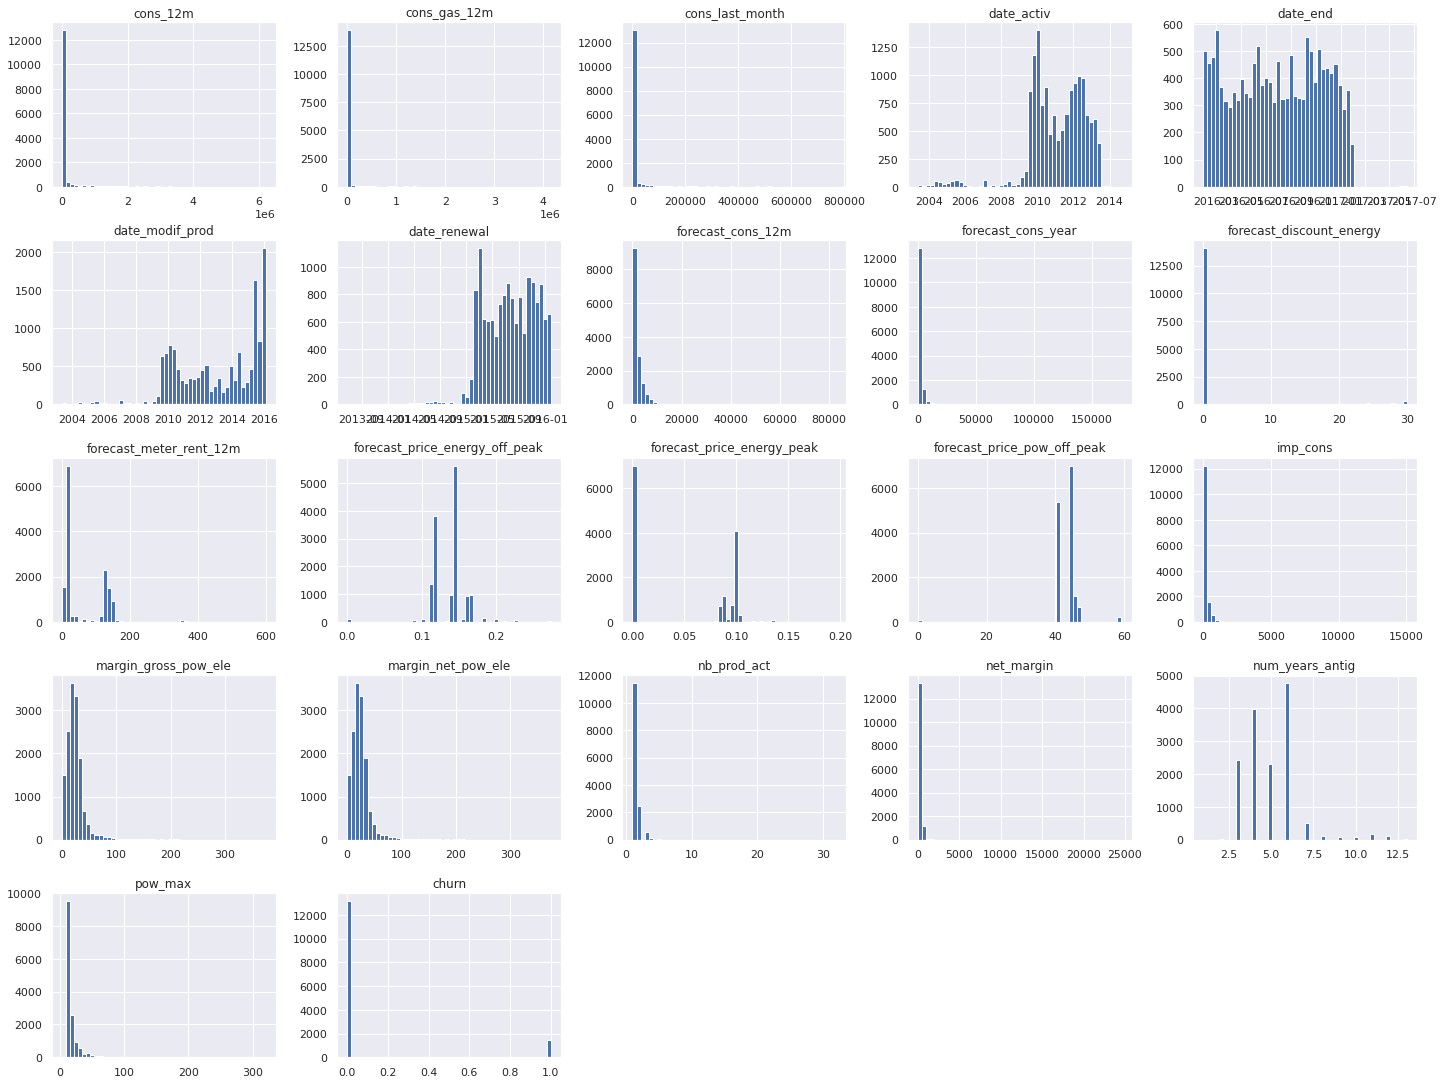

In [84]:
client_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

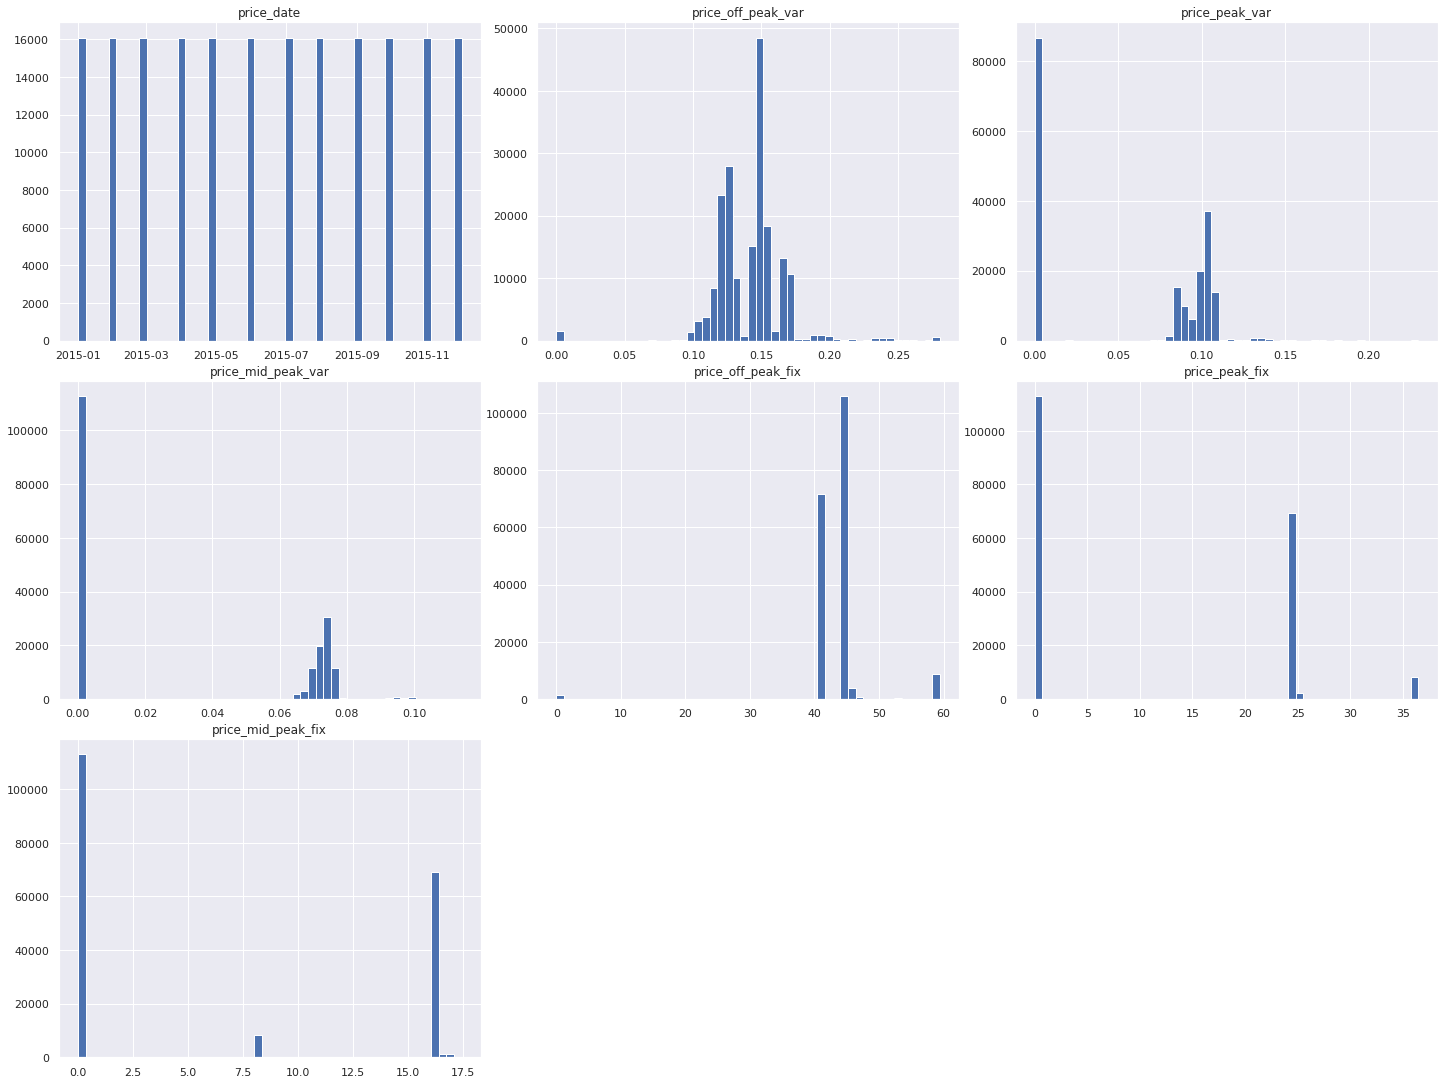

In [92]:
price_df.hist(bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [93]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [61]:
price_df.groupby('id')['price_off_peak_var'].mean().describe()

count    16096.000000
mean         0.141022
std          0.024184
min          0.000000
25%          0.124068
50%          0.147251
75%          0.150171
max          0.278759
Name: price_off_peak_var, dtype: float64

In [95]:
price_df.groupby('id')['price_peak_var'].mean().describe()

count    16096.000000
mean         0.054636
std          0.049505
min          0.000000
25%          0.000000
50%          0.085936
75%          0.102290
max          0.196275
Name: price_peak_var, dtype: float64

In [96]:
price_df.groupby('id')['price_mid_peak_var'].mean().describe()

count    16096.000000
mean         0.030503
std          0.036016
min          0.000000
25%          0.000000
50%          0.000000
75%          0.072525
max          0.102951
Name: price_mid_peak_var, dtype: float64

In [97]:
price_df.groupby('id')['price_off_peak_fix'].mean().describe()

count    16096.000000
mean        43.334758
std          5.342514
min          0.000000
25%         40.688156
50%         44.281745
75%         44.370635
max         59.444710
Name: price_off_peak_fix, dtype: float64

In [98]:
price_df.groupby('id')['price_peak_fix'].mean().describe()

count    16096.000000
mean        10.625528
std         12.756070
min          0.000000
25%          0.000000
50%          0.000000
75%         24.388455
max         36.490692
Name: price_peak_fix, dtype: float64

In [99]:
price_df.groupby('id')['price_mid_peak_fix'].mean().describe()

count    16096.000000
mean         6.411368
std          7.718998
min          0.000000
25%          0.000000
50%          0.000000
75%         16.248109
max         16.818917
Name: price_mid_peak_fix, dtype: float64

# **Sub-Task 3:**

Prepare a half-page summary or slide of key findings and add some suggestions for data augmentation – which other sources of data should the client provide you with and which open source datasets might be useful? You should spend 10-15 minutes on this.

We found that:

1.   There is a massive growth of customers at PowerCo from 2009 to 2013, while a great churn of customers occurs in 2016. 
2.   Clients mostly renewed or update their services and products from PowerCo in 2015. 
3.   Despite that the distribution of client operations by month seems balanced, for clients, November is the most popular month to activate contracts with PowerCo, February is the most popular month to end contracts with Power, June is for updating products, and March is for the next contract renewal. 
4.   82% of clients only have the electricity service from PowerCo, and they are highly potential to churn. 
5.   The majority (mostly 90%) of clients have less than 3 products from PowerCo, and the fewer products a client has, the more they are likely to churn. 
6.   The majority of clients have been staying with PowerCo for 3 to 7 years. However, the clients stayed for 4 years is the most potential to churn. After staying for more than 4 years, the churn rate is gradually reducing.
7.   42.5% of clients (the most) are referred from the campaign lxidpiddsbxsbosboudacockeimpuepw, 6% churn occurred. 27.8% cliensts origined from the campaign kamkkxfxxuwbdslkwifmmcsiusiuosws, and the churn rate was 1.8%. The campaign ldkssxwpmemidmecebumciepifcamkci brought 19.7% of clients, but 1.8% of them churned. 
8.   The consumption groups can prove that the fewer clients consumed, the more they are the potential to churn. 

